In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/dataset15min/array_Xtrain_down_equals.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

524523

In [6]:
with open('dataset/generado/dataset15min/array_Ytrain_down_equals.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

524523

In [8]:
with open('dataset/generado/dataset15min/array_Xval_down_equals.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

12033

In [10]:
with open('dataset/generado/dataset15min/array_Yval_down_equals.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

12033

In [12]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

88632

In [14]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

88632

In [16]:
epochs = 20
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mse', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
array_Xtrain

array([[[0.33043478, 0.        , 0.25423729, 1.        , 1.        ],
        [0.34347826, 0.        , 0.50847458, 1.        , 1.        ],
        [0.33913043, 0.        , 0.76271186, 1.        , 1.        ],
        ...,
        [0.08478261, 0.30434783, 0.        , 0.        , 0.5       ],
        [0.07608696, 0.30434783, 0.25423729, 0.        , 0.5       ],
        [0.0673913 , 0.30434783, 0.50847458, 0.        , 0.5       ]],

       [[0.34347826, 0.        , 0.50847458, 1.        , 1.        ],
        [0.33913043, 0.        , 0.76271186, 1.        , 1.        ],
        [0.35      , 0.04347826, 0.        , 0.8       , 1.        ],
        ...,
        [0.07608696, 0.30434783, 0.25423729, 0.        , 0.5       ],
        [0.0673913 , 0.30434783, 0.50847458, 0.        , 0.5       ],
        [0.05869565, 0.30434783, 0.76271186, 0.        , 0.5       ]],

       [[0.33913043, 0.        , 0.76271186, 1.        , 1.        ],
        [0.35      , 0.04347826, 0.        , 0.8       , 1. 

In [18]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [19]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False)
#history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_v1.h5')

Epoch 1/20
16392/16392 [==============================] - 327s 20ms/step - loss: 0.0016 - mae: 0.0290 - mse: 0.0016 - val_loss: 0.0013 - val_mae: 0.0290 - val_mse: 0.0013
Epoch 2/20
16392/16392 [==============================] - 185s 11ms/step - loss: 0.0011 - mae: 0.0239 - mse: 0.0011 - val_loss: 0.0014 - val_mae: 0.0251 - val_mse: 0.0014
Epoch 3/20
16392/16392 [==============================] - 192s 12ms/step - loss: 9.9531e-04 - mae: 0.0231 - mse: 9.9531e-04 - val_loss: 0.0011 - val_mae: 0.0240 - val_mse: 0.0011
Epoch 4/20
16392/16392 [==============================] - 197s 12ms/step - loss: 9.6234e-04 - mae: 0.0227 - mse: 9.6234e-04 - val_loss: 6.5784e-04 - val_mae: 0.0198 - val_mse: 6.5784e-04
Epoch 5/20
16392/16392 [==============================] - 215s 13ms/step - loss: 9.3804e-04 - mae: 0.0223 - mse: 9.3804e-04 - val_loss: 0.0010 - val_mae: 0.0241 - val_mse: 0.0010
Epoch 6/20
16392/16392 [==============================] - 225s 14ms/step - loss: 9.3035e-04 - mae: 0.0223 - mse: 

2770/2770 [==============================] - 13s 5ms/step - loss: 8.9359e-04 - mae: 0.0208 - mse: 8.9359e-04
test loss, test acc: [0.0008935937657952309, 0.020816199481487274, 0.0008935937657952309]


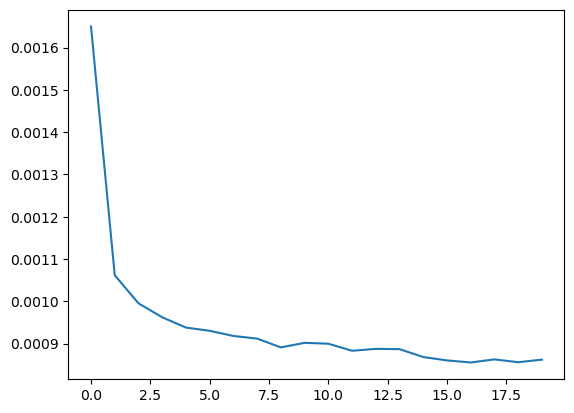

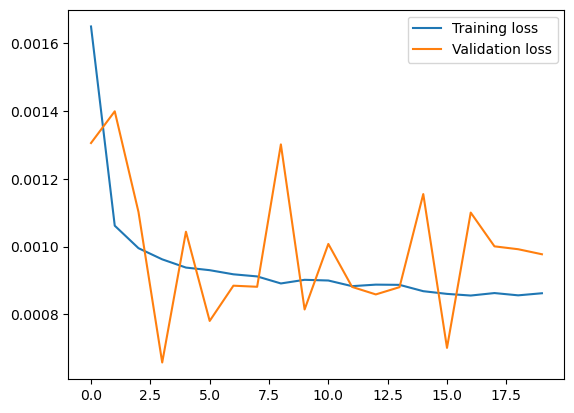

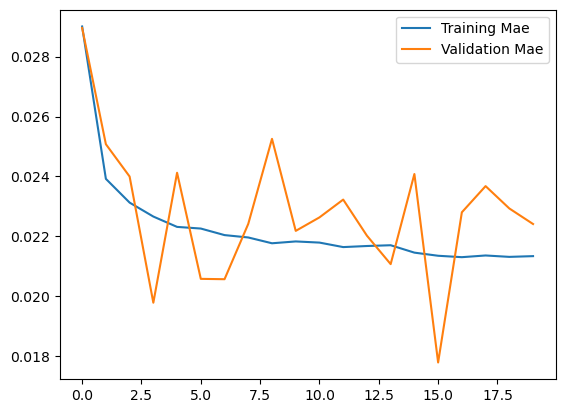

In [20]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

2770/2770 [==============================] - 12s 4ms/step


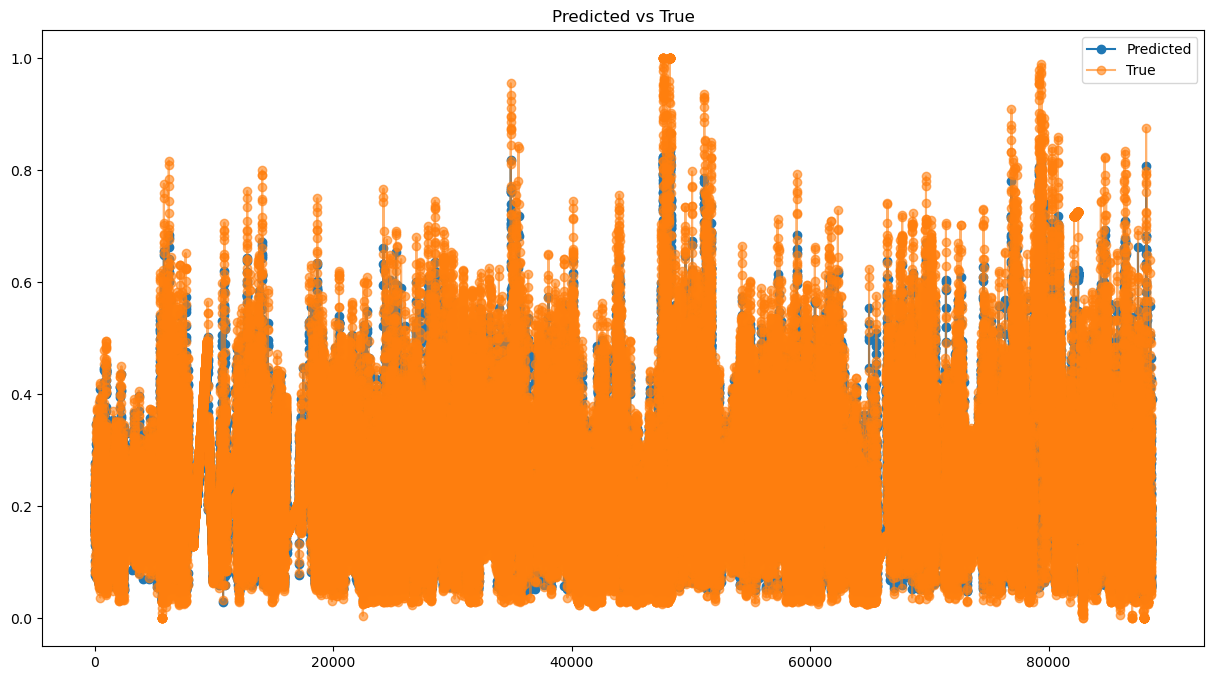

In [21]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [22]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.020816198890543893,
 'mse': 0.02989303001790538,
 'rmse': 0.0008935932436513921}

In [37]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)

df_YTest = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level True']) 

yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_YTest2 = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict']) 


In [38]:
df_YTest['Glucose level Predict']=df_YTest2['Glucose level Predict']

In [39]:
df_YTest

,Glucose level True,Glucose level Predict
0,116.0,111.870087
1,122.0,123.728989
2,117.0,126.691658
3,112.0,114.423210
4,115.0,113.042503
...,...,...
88627,137.0,126.032784
88628,177.0,158.759262
88629,198.0,187.795227
88630,216.0,193.057281


In [24]:
import matplotlib.pyplot as plt


#This function takes in the reference values and the prediction values as lists and returns a list with each index corresponding to the total number
#of points within that zone (0=A, 1=B, 2=C, 3=D, 4=E) and the plot
def clarke_error_grid(ref_values, pred_values, title_string):

    #Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values) == len(pred_values)), "Unequal number of values (reference : {}) (prediction : {}).".format(len(ref_values), len(pred_values))

    #Checks to see if the values are within the normal physiological range, otherwise it gives a warning
    if max(ref_values) > 400 or max(pred_values) > 400:
        print("Input Warning: the maximum reference value {} or the maximum prediction value {} exceeds the normal physiological range of glucose (<400 mg/dl).".format(max(ref_values), max(pred_values)))
    if min(ref_values) < 0 or min(pred_values) < 0:
        print("Input Warning: the minimum reference value {} or the minimum prediction value {} is less than 0 mg/dl.".format(min(ref_values),  min(pred_values)))

    #Clear plot
    plt.clf()

    #Set up plot
    plt.scatter(ref_values, pred_values, marker='o', color='black', s=8)
    plt.title(title_string + " Clarke Error Grid")
    plt.xlabel("Reference Concentration (mg/dl)")
    plt.ylabel("Prediction Concentration (mg/dl)")
    plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.gca().set_facecolor('white')

    #Set axes lengths
    plt.gca().set_xlim([0, 400])
    plt.gca().set_ylim([0, 400])
    plt.gca().set_aspect((400)/(400))

    #Plot zone lines
    plt.plot([0,400], [0,400], ':', c='black')                      #Theoretical 45 regression line
    plt.plot([0, 175/3], [70, 70], '-', c='black')
    #plt.plot([175/3, 320], [70, 400], '-', c='black')
    plt.plot([175/3, 400/1.2], [70, 400], '-', c='black')           #Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
    plt.plot([70, 70], [84, 400],'-', c='black')
    plt.plot([0, 70], [180, 180], '-', c='black')
    plt.plot([70, 290],[180, 400],'-', c='black')
    # plt.plot([70, 70], [0, 175/3], '-', c='black')
    plt.plot([70, 70], [0, 56], '-', c='black')                     #Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
    # plt.plot([70, 400],[175/3, 320],'-', c='black')
    plt.plot([70, 400], [56, 320],'-', c='black')
    plt.plot([180, 180], [0, 70], '-', c='black')
    plt.plot([180, 400], [70, 70], '-', c='black')
    plt.plot([240, 240], [70, 180],'-', c='black')
    plt.plot([240, 400], [180, 180], '-', c='black')
    plt.plot([130, 180], [0, 70], '-', c='black')

    #Add zone titles
    plt.text(30, 15, "A", fontsize=15)
    plt.text(370, 260, "B", fontsize=15)
    plt.text(280, 370, "B", fontsize=15)
    plt.text(160, 370, "C", fontsize=15)
    plt.text(160, 15, "C", fontsize=15)
    plt.text(30, 140, "D", fontsize=15)
    plt.text(370, 120, "D", fontsize=15)
    plt.text(30, 370, "E", fontsize=15)
    plt.text(370, 15, "E", fontsize=15)

    #Statistics from the data
    zone = [0] * 5
    for i in range(len(ref_values)):
        if (ref_values[i] <= 70 and pred_values[i] <= 70) or (pred_values[i] <= 1.2*ref_values[i] and pred_values[i] >= 0.8*ref_values[i]):
            zone[0] += 1    #Zone A

        elif (ref_values[i] >= 180 and pred_values[i] <= 70) or (ref_values[i] <= 70 and pred_values[i] >= 180):
            zone[4] += 1    #Zone E

        elif ((ref_values[i] >= 70 and ref_values[i] <= 290) and pred_values[i] >= ref_values[i] + 110) or ((ref_values[i] >= 130 and ref_values[i] <= 180) and (pred_values[i] <= (7/5)*ref_values[i] - 182)):
            zone[2] += 1    #Zone C
        elif (ref_values[i] >= 240 and (pred_values[i] >= 70 and pred_values[i] <= 180)) or (ref_values[i] <= 175/3 and pred_values[i] <= 180 and pred_values[i] >= 70) or ((ref_values[i] >= 175/3 and ref_values[i] <= 70) and pred_values[i] >= (6/5)*ref_values[i]):
            zone[3] += 1    #Zone D
        else:
            zone[1] += 1    #Zone B

    return plt, zone

Input Warning: the maximum reference value 499.99999999999994 or the maximum prediction value 438.4004211425781 exceeds the normal physiological range of glucose (<400 mg/dl).


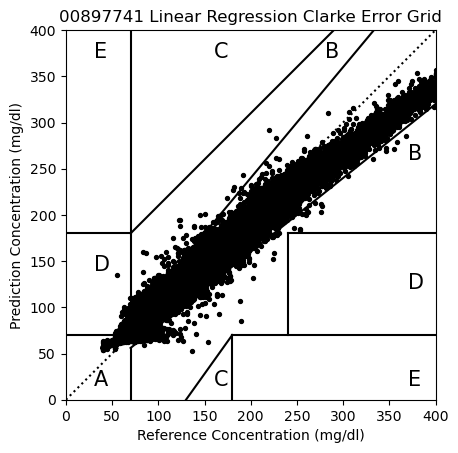

In [40]:
plot, zone = clarke_error_grid(df_YTest['Glucose level True'], df_YTest['Glucose level Predict'], "00897741 Linear Regression")
plot.show()